In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
import numpy as np

In [40]:
import cv2
from matplotlib import pyplot as plt
images = []
for i in range(60):
    #images.append(cv2.imread('/home/rpsingh/Desktop/cnn_image/img'+str(i)+'.jpg'))
    img = cv2.imread('/home/rpsingh/Desktop/cnn_image/img'+str(i)+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(img)

(60, 300, 300)


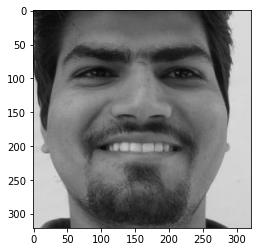

In [41]:
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (300,300)) 
img = np.array(images)
print(img.shape)
x_train0 = img
#x_train = np.expand_dims(x_train, -1)
y_train0 = [1]*60
plt.imshow(cv2.cvtColor(cv2.imread('/home/rpsingh/Desktop/cnn_image/img0.jpg'), cv2.COLOR_BGR2RGB))

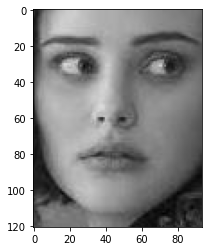

In [42]:
x_train1 = []
for i in range(6):
    imgg = cv2.imread('/home/rpsingh/Desktop/cnn_image/imgg'+str(i)+'.jpg')
    imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
    imgg = cv2.resize(imgg, (300, 300))
    x_train1.append(imgg)
    
y_train1 = []
for i in range(len(x_train1)):
    y_train1.append(0)

plt.imshow(cv2.cvtColor(cv2.imread('/home/rpsingh/Desktop/cnn_image/imgg0.jpg'), cv2.COLOR_BGR2RGB))

In [43]:
x_train = []
for i in range(60):
    x_train.append(x_train0[i])
for i in range(len(x_train1)):
    x_train.append(x_train1[i])
    
y_train = []
for i in range(len(y_train0)):
    y_train.append(y_train0[i])
for i in range(len(y_train1)):
    y_train.append(y_train1[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.expand_dims(x_train, -1)
x_train.shape

(66, 300, 300, 1)

In [44]:
kernal_size = (3,3)
i = Input(shape = x_train[0].shape)
x = Conv2D(20, kernal_size, strides =2, activation = 'relu')(i)
x = Conv2D(10, kernal_size, strides =2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(5, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(2, activation = 'softmax')(x)

model = Model(i, x)

In [45]:
model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [46]:
model_ = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
3/3 [==============================] - 0s 151ms/step - loss: 3.1057 - accuracy: 0.7576
Epoch 2/10
3/3 [==============================] - 0s 141ms/step - loss: 0.5928 - accuracy: 0.9091
Epoch 3/10
3/3 [==============================] - 0s 142ms/step - loss: 0.2157 - accuracy: 0.9091
Epoch 4/10
3/3 [==============================] - 0s 142ms/step - loss: 0.1573 - accuracy: 0.9091
Epoch 5/10
3/3 [==============================] - 0s 163ms/step - loss: 0.1468 - accuracy: 0.9091
Epoch 6/10
3/3 [==============================] - 0s 162ms/step - loss: 0.1803 - accuracy: 0.9091
Epoch 7/10
3/3 [==============================] - 0s 145ms/step - loss: 0.2090 - accuracy: 0.9091
Epoch 8/10
3/3 [==============================] - 0s 140ms/step - loss: 0.2089 - accuracy: 0.9091
Epoch 9/10
3/3 [==============================] - 0s 136ms/step - loss: 0.1984 - accuracy: 0.9091
Epoch 10/10
3/3 [==============================] - 0s 136ms/step - loss: 0.2086 - accuracy: 0.9091


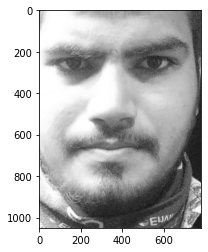

In [47]:
test_img = cv2.imread('/home/rpsingh/Desktop/img.jpg')
#top, down, right, left = face_recognition.face_locations(test_img)[0]
#test_img = test_img[top:down, left:right]
test_img = test_img[350:1400, 0:780]
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
test_img = cv2.resize(test_img, (300, 300))
plt.show()

In [48]:
test_img = np.expand_dims(test_img, -1)
test_img = np.expand_dims(test_img, 0)
test_img.shape

(1, 300, 300, 1)

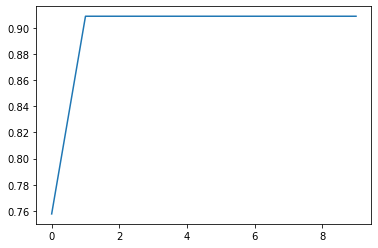

In [49]:
plt.plot(model_.history['accuracy'])

In [50]:
res = model.predict(test_img)[0]
res

array([7.4841792e-04, 9.9925154e-01], dtype=float32)

In [ ]:
#this tells image belogs to class 1 which accuracy of 99%